In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


In [2]:
df = pd.read_csv('C:\\Users\\ADMIN11\\Desktop\\csv\\bank.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,8/20/2011,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,8/23/2011,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,8/27/2011,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,9/1/2011,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,9/5/2011,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
df.shape

(30471, 292)

In [4]:
df['id'].is_unique

True

In [5]:
df.set_index("id")  #### DOUBT #### index is still not changed
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,8/20/2011,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,8/23/2011,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,8/27/2011,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,9/1/2011,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,9/5/2011,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [6]:
df.iloc[5]

id                           6
timestamp             9/6/2011
full_sq                     67
life_sq                   46.0
floor                     14.0
                        ...   
mosque_count_5000            1
leisure_count_5000          20
sport_count_5000           113
market_count_5000           17
price_doc              9100000
Name: 5, Length: 292, dtype: object

In [7]:
#seperating non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_numeric.columns.values
non_num_cols

array(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
       'big_road1_1line', 'railroad_1line', 'ecology'], dtype=object)

<AxesSubplot:>

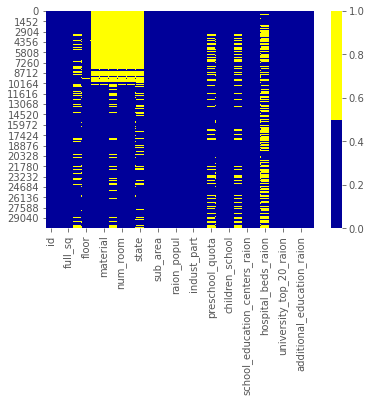

In [8]:
# heat map to identify NAN values from large data
cols = df.columns[:30]
colors = ['#000099','#ffff00']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))

In [9]:
# to find the % of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{}-{}%'.format(col, round(pct_missing*100)))

id-0%
timestamp-0%
full_sq-0%
life_sq-21%
floor-1%
max_floor-31%
material-31%
build_year-45%
num_room-31%
kitch_sq-31%
state-44%
product_type-0%
sub_area-0%
area_m-0%
raion_popul-0%
green_zone_part-0%
indust_part-0%
children_preschool-0%
preschool_quota-22%
preschool_education_centers_raion-0%
children_school-0%
school_quota-22%
school_education_centers_raion-0%
school_education_centers_top_20_raion-0%
hospital_beds_raion-47%
healthcare_centers_raion-0%
university_top_20_raion-0%
sport_objects_raion-0%
additional_education_raion-0%
culture_objects_top_25-0%
culture_objects_top_25_raion-0%
shopping_centers_raion-0%
office_raion-0%
thermal_power_plant_raion-0%
incineration_raion-0%
oil_chemistry_raion-0%
radiation_raion-0%
railroad_terminal_raion-0%
big_market_raion-0%
nuclear_reactor_raion-0%
detention_facility_raion-0%
full_all-0%
male_f-0%
female_f-0%
young_all-0%
young_male-0%
young_female-0%
work_all-0%
work_male-0%
work_female-0%
ekder_all-0%
ekder_male-0%
ekder_female-0%
0_6_all-0

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: product_type
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_c

<AxesSubplot:xlabel='index'>

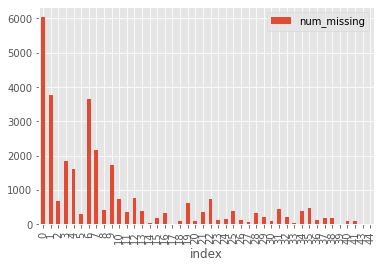

In [10]:
# creating indicator of missing data 
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print ('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
# using that same indicator to plot histogram
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis = 1)

df['num_missing']. value_counts().reset_index().sort_values(by = 'index').plot.bar(x = 'index', y = 'num_missing')

In [11]:
# ways of handling data
# we can delete a particular row/coloumn
# we can use algorithm to fill that space 
# find mean,median,mode of a coloumn and fill that empty space with that value ## demonstrated below
# KNN algorithm can also be helpfull. (try to figure out) 

In [12]:
med = df["life_sq"].median()
df["life_sq"] = df["life_sq"].fillna(med)

In [13]:
df["life_sq"].head(562)

0      27.0
1      19.0
2      29.0
3      50.0
4      77.0
       ... 
557    30.0
558    15.0
559    30.0
560    30.0
561    36.0
Name: life_sq, Length: 562, dtype: float64

In [14]:
mod = df["life_sq"].mode()
mod

0    30.0
dtype: float64

In [15]:
mean = df["life_sq"].mean()
mean

33.48088346296478

In [16]:
mean1 = df['full_sq'].mean()
mean1

54.21426930524105

In [17]:
ind_missing = df[df['num_missing']>35].index
df_missing_rows = df.drop(ind_missing, axis= 0)
                          

# Code to deal with missing values in rows and columns#

In [19]:
# first figure out the columns which have numeric data
df_numeric = df.select_dtypes(include=[np.number])
num_cols = df_numeric.columns.values


## now figure out null values in those columns by using for loop
for col in num_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('imputing the missing values are:{}'.format(col))
        df['{}_missing'.format(col)] = missing
        mean = df[col].mean()
        df[col]= df[col].fillna(mean)

imputing the missing values are:floor
imputing the missing values are:max_floor
imputing the missing values are:material
imputing the missing values are:build_year
imputing the missing values are:num_room
imputing the missing values are:kitch_sq
imputing the missing values are:state
imputing the missing values are:preschool_quota
imputing the missing values are:school_quota
imputing the missing values are:hospital_beds_raion
imputing the missing values are:raion_build_count_with_material_info
imputing the missing values are:build_count_block
imputing the missing values are:build_count_wood
imputing the missing values are:build_count_frame
imputing the missing values are:build_count_brick
imputing the missing values are:build_count_monolith
imputing the missing values are:build_count_panel
imputing the missing values are:build_count_foam
imputing the missing values are:build_count_slag
imputing the missing values are:build_count_mix
imputing the missing values are:raion_build_count_with

In [ ]:
df.head()

In [22]:
df_non_numeric = df.select_dtypes(exclude=[np.number])     
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:                              
    missing2 = df[col].isnull()
    non_num_missing = np.sum(missing)
    
    if non_num_missing > 0:
        print ('filling the missing value in: {}'.format(col))
        df['{}_missing'.format(col)]= missing    #DOUBT  if this line is done in reverse order wrt = code deos not execute#
        
        top = df[col].describe()['top']
        df[col] = df[col].fillna(top)
       
      

In [ ]:
# since non_numeric coloumns dont have any null values the output of the above code is nothing 

<AxesSubplot:>

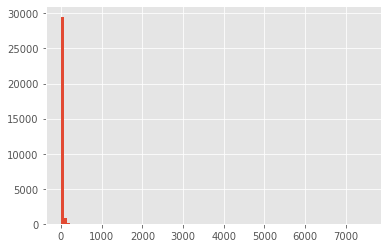

In [23]:
# now lets try and find outliers in specific coloumns


df['life_sq'].hist(bins = 100)

<AxesSubplot:>

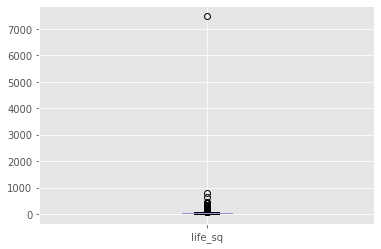

In [26]:
df.boxplot(column = ['life_sq'])

In [28]:
df['life_sq'].describe()    ## trying to figure out the exact value of the outlier that is visible in the above diagram #

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

<AxesSubplot:>

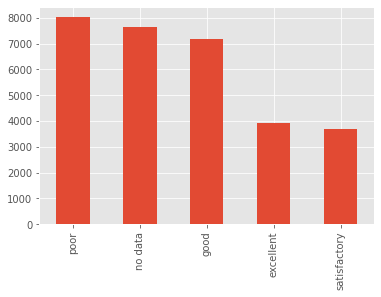

In [29]:
df['ecology'].value_counts().plot.bar()   ## checking authenticity of data in our dataset

In [30]:
### conclusions 
### first two towers depict poor and no data 
### satisfactory and excellent data towers is pretty small as compared to other towers
### good data is also fine 

In [33]:
num_rows = len(df.index)                            #create variable as per len of rows ie 290 or something
low_informative_cols = []                            # created a list named low informative cols which is empty

for col in df.columns:                                 # iterate through the coloumns
    cnts = df[col].value_counts(dropna = False)        # value_counts is trying to find outliers in those columns
    top_cnts = (cnts/num_rows).iloc[0]                  # here cnts divide by num of rows is  trying to find percentage 
    
    if top_cnts > 0.95:
        low_informative_cols.append(col)
        print(cnts)
        print()

no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

no     29690
yes      781
Name: big_road1_1line, dtype: int64

no     29578
yes      893
Name: railroad_1line, dtype: int64

0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

0    30322
1      149
Name: mosque_count_500, dtype: int64

0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

0    29887
1      584
Name: mosque_count_1000, dtype: int64

0    29319
1     1152
Name: mosque_count_1500, dtype: int64

False    30304
True       167
Name: floor_ismissing, dtype: int64

False    30470
True         1
Name: product_type_ismissing, dtype: int64

False    30446
True        25
Name: metro_min_walk_ismissing, dtype: int64

False    30446
True        25
Name: metro_

In [34]:
# it is to our discretion what is to be done with these values
# whether to delete or replace 
#depends on domain or aim 

In [ ]:
### HOMEWORK . FIND A CODE TO FIND DUPLICATES IN A PARTICULAR COLUMN